In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd


small_cap_data = yf.download("ETSY", start="2017-01-01", end="2017-03-30")

large_cap_data = yf.download("MSFT", start="2017-01-01", end="2017-03-30")

small_cap_data['SMA'] = small_cap_data['Close'].rolling(window=20).mean() #SMA for small cap
large_cap_data['SMA'] = large_cap_data['Close'].rolling(window=20).mean() #SMA for large cap

small_cap_data['std'] = small_cap_data['Close'].rolling(window=6).std() #standard deviation for small cap
large_cap_data['std'] = large_cap_data['Close'].rolling(window=6).std() #standard deviation for large cap



small_cap_data['upper_band'] = small_cap_data['SMA'] + 2 * small_cap_data['std'] #upperband of bollinger for small cap

small_cap_data['lower_band'] = small_cap_data['SMA'] - 2 * small_cap_data['std'] # lowerband of bollinger for small cap



large_cap_data['upper_band'] = large_cap_data['SMA'] + 2 * large_cap_data['std'] #upperband of bollinger for large cap

large_cap_data['lower_band'] = large_cap_data['SMA'] - 2 * large_cap_data['std'] # lowerband of bollinger for large cap







[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


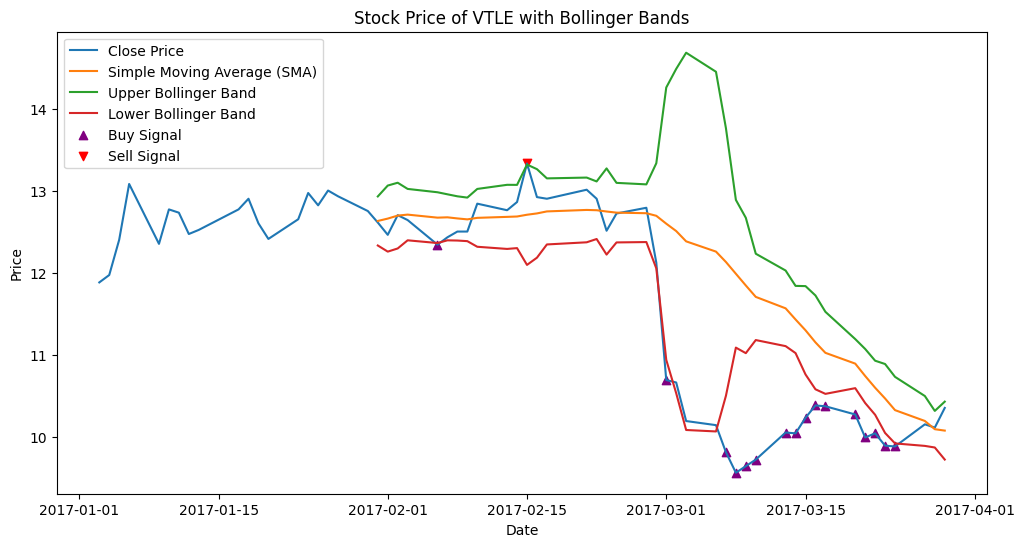

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(small_cap_data['Close'], label='Close Price')
plt.plot(small_cap_data['SMA'], label='Simple Moving Average (SMA)')
plt.plot(small_cap_data['upper_band'], label='Upper Bollinger Band')
plt.plot(small_cap_data['lower_band'], label='Lower Bollinger Band')


#trading signals
small_cap_data['Signal'] = ''



small_cap_data.loc[small_cap_data['Close'] > small_cap_data['upper_band'], 'Signal'] = 'Sell'  #small cap trading signals
small_cap_data.loc[small_cap_data['Close'] < small_cap_data['lower_band'], 'Signal'] = 'Buy'

buy_signals = small_cap_data[small_cap_data['Signal'] == 'Buy']
sell_signals = small_cap_data[ small_cap_data['Signal'] == 'Sell']

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='purple', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal')


plt.title("Stock Price of VTLE with Bollinger Bands")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

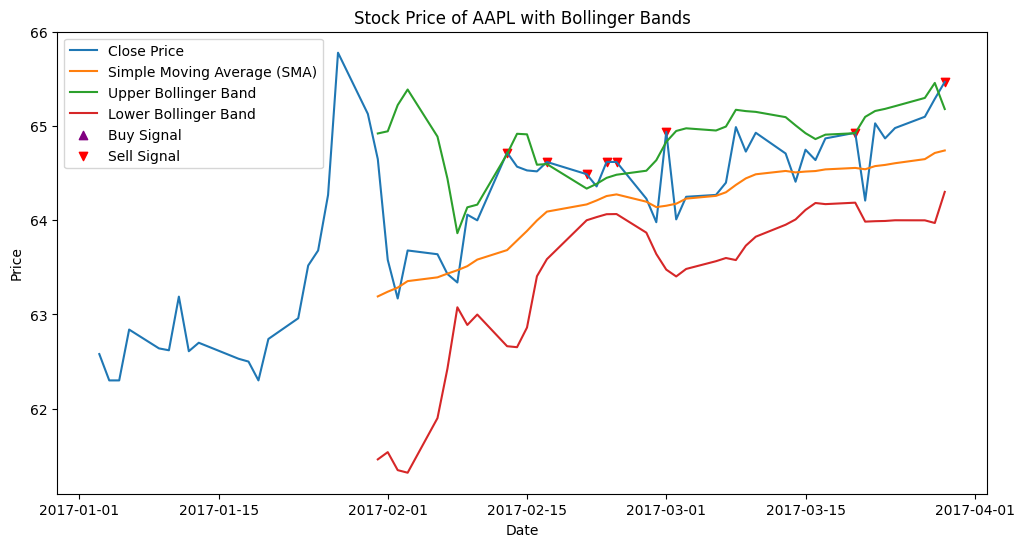

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(large_cap_data['Close'], label='Close Price')
plt.plot(large_cap_data['SMA'], label='Simple Moving Average (SMA)')
plt.plot(large_cap_data['upper_band'], label='Upper Bollinger Band')
plt.plot(large_cap_data['lower_band'], label='Lower Bollinger Band')

large_cap_data['Signal'] = ''
large_cap_data.loc[large_cap_data['Close'] > large_cap_data['upper_band'], 'Signal'] = 'Sell'
large_cap_data.loc[large_cap_data['Close'] < large_cap_data['lower_band'], 'Signal'] = 'Buy'



buy_signals = large_cap_data[large_cap_data['Signal'] == 'Buy']
sell_signals = large_cap_data[ large_cap_data['Signal'] == 'Sell']

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='purple', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal')


plt.title("Stock Price of AAPL with Bollinger Bands")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [5]:
#Here we are calculating the returns due to our strategy thus analysing the performance

small_cap_data['Position'] = small_cap_data['Signal'].shift()  # Shift the signals by one row
large_cap_data['Position'] = large_cap_data['Signal'].shift()

small_cap_data['Return'] = (small_cap_data['Close'] / small_cap_data['Close'].shift(1)) - 1
large_cap_data['Return'] = (large_cap_data['Close'] / large_cap_data['Close'].shift(1)) - 1

large_cap_data['Position'] = 0
large_cap_data.loc[large_cap_data['Signal'] == 'Buy', 'Position'] = 1  #setting buy signal as +1
large_cap_data.loc[large_cap_data['Signal'] == 'Sell', 'Position'] = -1  #setting sell signal as -1


#similarly for small cap
small_cap_data['Position'] = 0
small_cap_data.loc[large_cap_data['Signal'] == 'Buy', 'Position'] = 1
small_cap_data.loc[large_cap_data['Signal'] == 'Sell', 'Position'] = -1





small_cap_data['Strategy_Return'] = small_cap_data['Position'] * small_cap_data['Return']
large_cap_data['Strategy_Return'] = large_cap_data['Position'] * large_cap_data['Return']


small_cap_data['Cumulative_Return'] = (1 + small_cap_data['Strategy_Return']).cumprod() - 1   # Cumulative returns
large_cap_data['Cumulative_Return'] = (1 + large_cap_data['Strategy_Return']).cumprod() - 1


small_cap_avg_return = small_cap_data['Strategy_Return'].mean()  #Average returns
large_cap_avg_return = large_cap_data['Strategy_Return'].mean()

#risk-adjusted returns (Sharpe ratio)
risk_free_rate = 0.05  # Assuming a risk-free rate of 5%
small_cap_sharpe_ratio = (small_cap_avg_return - risk_free_rate) / small_cap_data['Strategy_Return'].std()
large_cap_sharpe_ratio = (large_cap_avg_return - risk_free_rate) / large_cap_data['Strategy_Return'].std()

# Calculate maximum drawdown
small_cap_max_drawdown = small_cap_data['Cumulative_Return'].max() - small_cap_data['Cumulative_Return'].min()
large_cap_max_drawdown = large_cap_data['Cumulative_Return'].max() - large_cap_data['Cumulative_Return'].min()

# Print the results
print("Small Cap Strategy:")
print("Cumulative Return:", small_cap_data['Cumulative_Return'].iloc[-1])
print("Average Return:", small_cap_avg_return)
print("Sharpe Ratio:", small_cap_sharpe_ratio)
print("Maximum Drawdown:", small_cap_max_drawdown)

print("\nLarge Cap Strategy:")
print("Cumulative Return:", large_cap_data['Cumulative_Return'].iloc[-1])
print("Average Return:", large_cap_avg_return)
print("Sharpe Ratio:", large_cap_sharpe_ratio)
print("Maximum Drawdown:", large_cap_max_drawdown)

Small Cap Strategy:
Cumulative Return: 0.11533076629811312
Average Return: 0.001976073424490635
Sharpe Ratio: -2.9229460530859606
Maximum Drawdown: 0.1432567551368653

Large Cap Strategy:
Cumulative Return: -0.033145889759434666
Average Return: -0.0005680432605210409
Sharpe Ratio: -20.18845284409907
Maximum Drawdown: 0.033145889759434666


In [6]:
#Stochastic Oscillator



small_cap_data['highest_high'] = small_cap_data['High'].rolling(window=14).max()    #highest high for small cap
small_cap_data['lowest_low'] =small_cap_data['Low'].rolling(window=14).min()        #lowest low for small cap



large_cap_data['highest_high'] = large_cap_data['High'].rolling(window=14).max()     #highest high for large cap
large_cap_data['lowest_low'] = large_cap_data['Low'].rolling(window=14).min()         #lowest low for large cap



small_cap_data['%K'] = (small_cap_data['Close'] - small_cap_data['lowest_low']) / (small_cap_data['highest_high'] - small_cap_data['lowest_low']) * 100  #Scholastic operator for small cap

large_cap_data['%K'] = (large_cap_data['Close'] - large_cap_data['lowest_low']) / (large_cap_data['highest_high'] - large_cap_data['lowest_low']) * 100  # scholastic operator f0r large large_cap_data


small_cap_data['%D'] = small_cap_data['%K'].rolling(window=3).mean() #calculation of %D by smoothing period 3

large_cap_data['%D'] = large_cap_data['%K'].rolling(window=3).mean()


small_cap_data['SignalSO'] = ''
small_cap_data.loc[(small_cap_data['%K'] < 20) & (small_cap_data['%K'].shift(1) > small_cap_data['%D'].shift(1)), 'SignalSO'] = 'Buy'  #oversold line is set to 20
small_cap_data.loc[(small_cap_data['%K'] > 80) & (small_cap_data['%K'].shift(1) <small_cap_data['%D'].shift(1)), 'SignalSO'] = 'Sell'  #overbought line is set to 80

#when %K smaller than 20 and previous %K is grter than %D the signal is set to buy signal
#when %K more than 80 and previous %K is less than %D the signal is set to sell signal


large_cap_data['SignalSO'] = ''
large_cap_data.loc[(large_cap_data['%K'] < 20) & (large_cap_data['%K'].shift(1) > large_cap_data['%D'].shift(1)), 'SignalSO'] = 'Buy'
large_cap_data.loc[(large_cap_data['%K'] > 80) & (large_cap_data['%K'].shift(1) < large_cap_data['%D'].shift(1)), 'SignalSO'] = 'Sell'

#similar strategy as small cap stock above






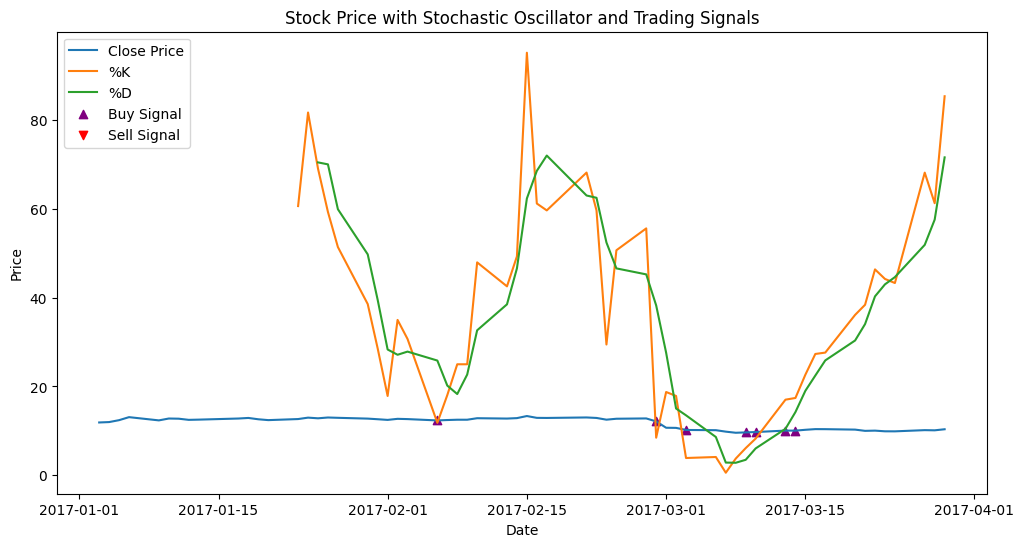

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(small_cap_data['Close'], label='Close Price')
plt.plot(small_cap_data['%K'], label='%K')
plt.plot(small_cap_data['%D'], label='%D')

buy_signals = small_cap_data[small_cap_data['SignalSO'] == 'Buy']
sell_signals = small_cap_data[ small_cap_data['SignalSO'] == 'Sell']
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='purple', label='Buy Signal') #green arrow up for buy signal
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal') #red arrow down for sell signal

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Stochastic Oscillator and Trading Signals')
plt.legend()
plt.show()


# above is trade signal for small cap

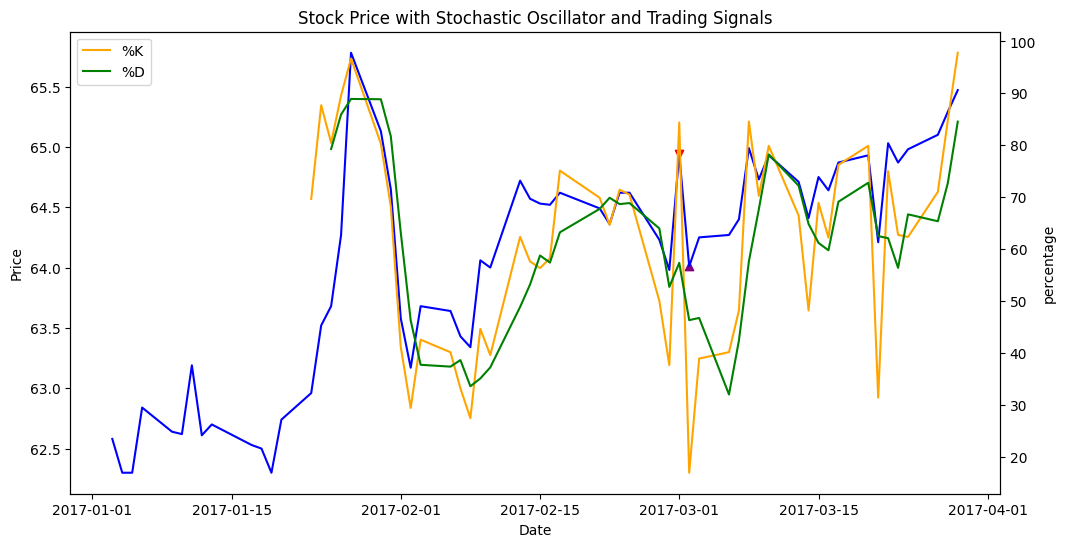

In [8]:
fig,ax1=plt.subplots(figsize=(12, 6))

ax1.plot(large_cap_data['Close'], label='Close Price',color='blue')
ax2=ax1.twinx()
ax2.plot(large_cap_data['%K'], label='%K',color='orange')
ax2.plot(large_cap_data['%D'], label='%D',color='green')

buy_signals =large_cap_data[large_cap_data['SignalSO'] == 'Buy']
sell_signals = large_cap_data[ large_cap_data['SignalSO'] == 'Sell']
ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='purple', label='Buy Signal')
ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal')

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('percentage')
plt.title('Stock Price with Stochastic Oscillator and Trading Signals')
plt.legend()
plt.show()


# above is trade signal for large cap

In [9]:

#Here we are calculating the returns due to our strategy thus analysing the performance

small_cap_data['Position'] = small_cap_data['SignalSO'].shift()  # Shift the signals by one row
large_cap_data['Position'] = large_cap_data['SignalSO'].shift()

small_cap_data['Return'] = (small_cap_data['Close'] / small_cap_data['Close'].shift(1)) - 1
large_cap_data['Return'] = (large_cap_data['Close'] / large_cap_data['Close'].shift(1)) - 1

large_cap_data['Position'] = 0
large_cap_data.loc[large_cap_data['SignalSO'] == 'Buy', 'Position'] = 1  #setting buy signal as +1
large_cap_data.loc[large_cap_data['SignalSO'] == 'Sell', 'Position'] = -1  #setting sell signal as -1


#similarly for small cap
small_cap_data['Position'] = 0
small_cap_data.loc[large_cap_data['SignalSO'] == 'Buy', 'Position'] = 1
small_cap_data.loc[large_cap_data['SignalSO'] == 'Sell', 'Position'] = -1


small_cap_data['Strategy_Return'] = small_cap_data['Position'] * small_cap_data['Return']
large_cap_data['Strategy_Return'] = large_cap_data['Position'] * large_cap_data['Return']


small_cap_data['Cumulative_Return'] = (1 + small_cap_data['Strategy_Return']).cumprod() - 1   # Cumulative returns
large_cap_data['Cumulative_Return'] = (1 + large_cap_data['Strategy_Return']).cumprod() - 1


small_cap_avg_return = small_cap_data['Strategy_Return'].mean()  #Average returns
large_cap_avg_return = large_cap_data['Strategy_Return'].mean()

#risk-adjusted returns (Sharpe ratio)
risk_free_rate = 0.05  # Assuming a risk-free rate of 5%
small_cap_sharpe_ratio = (small_cap_avg_return - risk_free_rate) / small_cap_data['Strategy_Return'].std()
large_cap_sharpe_ratio = (large_cap_avg_return - risk_free_rate) / large_cap_data['Strategy_Return'].std()

# Calculate maximum drawdown
small_cap_max_drawdown = small_cap_data['Cumulative_Return'].max() - small_cap_data['Cumulative_Return'].min()
large_cap_max_drawdown = large_cap_data['Cumulative_Return'].max() - large_cap_data['Cumulative_Return'].min()

# Print the results
print("Small Cap Strategy:")
print("Cumulative Return:", small_cap_data['Cumulative_Return'].iloc[-1])
print("Average Return:", small_cap_avg_return)
print("Sharpe Ratio:", small_cap_sharpe_ratio)
print("Maximum Drawdown:", small_cap_max_drawdown)

print("\nLarge Cap Strategy:")
print("Cumulative Return:", large_cap_data['Cumulative_Return'].iloc[-1])
print("Average Return:", large_cap_avg_return)
print("Sharpe Ratio:", large_cap_sharpe_ratio)
print("Maximum Drawdown:", large_cap_max_drawdown)



Small Cap Strategy:
Cumulative Return: 0.11484937805755102
Average Return: 0.001952211673855625
Sharpe Ratio: -3.1258285556974403
Maximum Drawdown: 0.11798682497345725

Large Cap Strategy:
Cumulative Return: -0.029110768620700167
Average Return: -0.0004970449179326011
Sharpe Ratio: -18.863127857294764
Maximum Drawdown: 0.029110768620700167


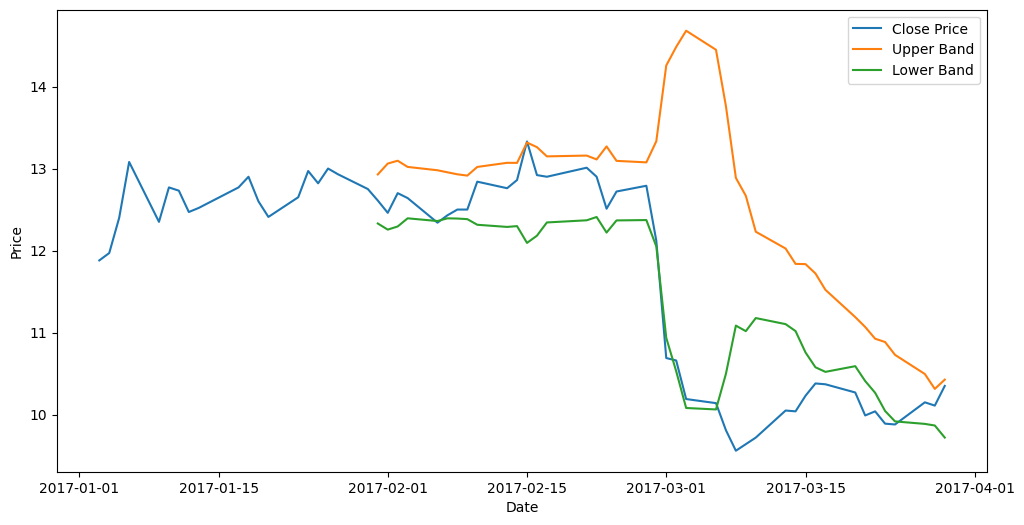

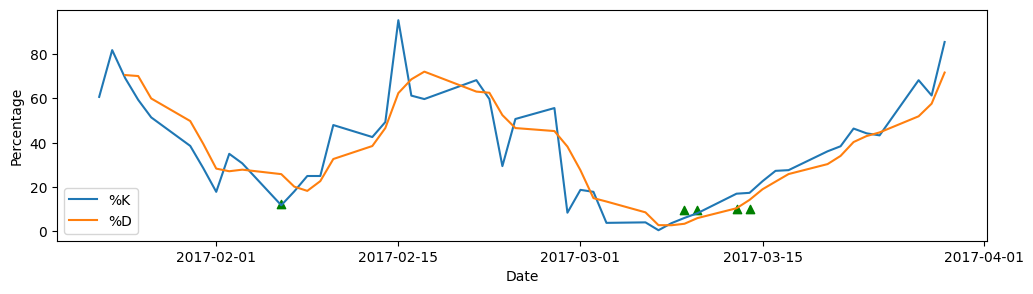

In [10]:
 #Bollinger Bands with the Stochastic Oscillator indicator


 small_cap_data['Signal101'] = ''
small_cap_data.loc[(small_cap_data['%K'] < 20) & (small_cap_data['%K'].shift(1) > small_cap_data['%D'].shift(1)) & (small_cap_data['Close'] <small_cap_data['lower_band']), 'Signal101'] = 'Buy'
small_cap_data.loc[(small_cap_data['%K'] >80) & (small_cap_data['%K'].shift(1) < small_cap_data['%D'].shift(1)) & (small_cap_data['Close'] > small_cap_data['upper_band']), 'Signal101'] = 'Sell'

# Plotting the price chart with Bollinger Bands and Stochastic Oscillator
plt.figure(figsize=(12, 6))
plt.plot(small_cap_data['Close'], label='Close Price')
plt.plot(small_cap_data['upper_band'], label='Upper Band')
plt.plot(small_cap_data['lower_band'], label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plotting the Stochastic Oscillator
plt.figure(figsize=(12, 3))
plt.plot(small_cap_data['%K'], label='%K')
plt.plot(small_cap_data['%D'], label='%D')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()

# Plotting the trading signals
buy_signals = small_cap_data[small_cap_data['Signal101'] == 'Buy']
sell_signals =small_cap_data[small_cap_data['Signal101'] == 'Sell']
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal')

plt.show()

In [11]:

#Here we are calculating the returns due to our strategy thus analysing the performance

small_cap_data['Position'] = small_cap_data['Signal101'].shift()  # Shift the signals by one row

small_cap_data['Return'] = (small_cap_data['Close'] / small_cap_data['Close'].shift(1)) - 1


small_cap_data['Position'] = 0
small_cap_data.loc[small_cap_data['Signal101'] == 'Buy', 'Position'] = 1
small_cap_data.loc[small_cap_data['Signal101'] == 'Sell', 'Position'] = -1

small_cap_data['Strategy_Return'] = small_cap_data['Position'] * small_cap_data['Return']

small_cap_data['Cumulative_Return'] = (1 + small_cap_data['Strategy_Return']).cumprod() - 1

small_cap_avg_return = small_cap_data['Strategy_Return'].mean()  #Average returns

#risk-adjusted returns (Sharpe ratio)
risk_free_rate = 0.05  # Assuming a risk-free rate of 5%
small_cap_sharpe_ratio = (small_cap_avg_return - risk_free_rate) / small_cap_data['Strategy_Return'].std()

# Calculate maximum drawdown
small_cap_max_drawdown = small_cap_data['Cumulative_Return'].max() - small_cap_data['Cumulative_Return'].min()

# Print the results
print("Small Cap Strategy:")
print("Cumulative Return:", small_cap_data['Cumulative_Return'].iloc[-1])
print("Average Return:", small_cap_avg_return)
print("Sharpe Ratio:", small_cap_sharpe_ratio)
print("Maximum Drawdown:", small_cap_max_drawdown)


Small Cap Strategy:
Cumulative Return: 0.02528328956724568
Average Return: 0.0004387848928229756
Sharpe Ratio: -8.78857986099776
Maximum Drawdown: 0.050038703100403814
